# Notebook on the dynamics of the creation and disappearance of links

This notebook will try to analyze recently created links (less than one year) based on data from facebook gathered as part of the algopol investigation.

## What I can do (at the moment)

1. Compute and Identify recent alters for an ego
1. Compute and plot frequencies and percentages of recent alters for a given ego
1. Compute and plot the proportion of recent alters per year for a given ego


## What I can't do (at the moment)


1. Compute and plot proportions against a given socio-economical category or a demographic profile.
1. Compute, label and plot against specific reasons. I don't have the "why" of an interaction.
1. Compute lost alters (unfriend, blocks)

## What I need 

1. Egos Age
1. Alters Age
1. The reason behind the interaction
1. An union of all the egos to compute and plot the mean and median number of recent alters for the whole dataset
1. An union of all the egos (in a specific and relevant category) to compute and plot the mean and median number of recent alters for a specific category.

## Computing the recent alter distribution

### Without Pandas (except for plotting)

In [1]:
from link_dynamics_func import *
sns.set()


In [2]:
recent_freq_percDF = recent_alters_freq_perc_df('../sample_data_recent_alter_csv/csv')

## Recent Links

### Distribution of recent ties in average

#### Linear Scale

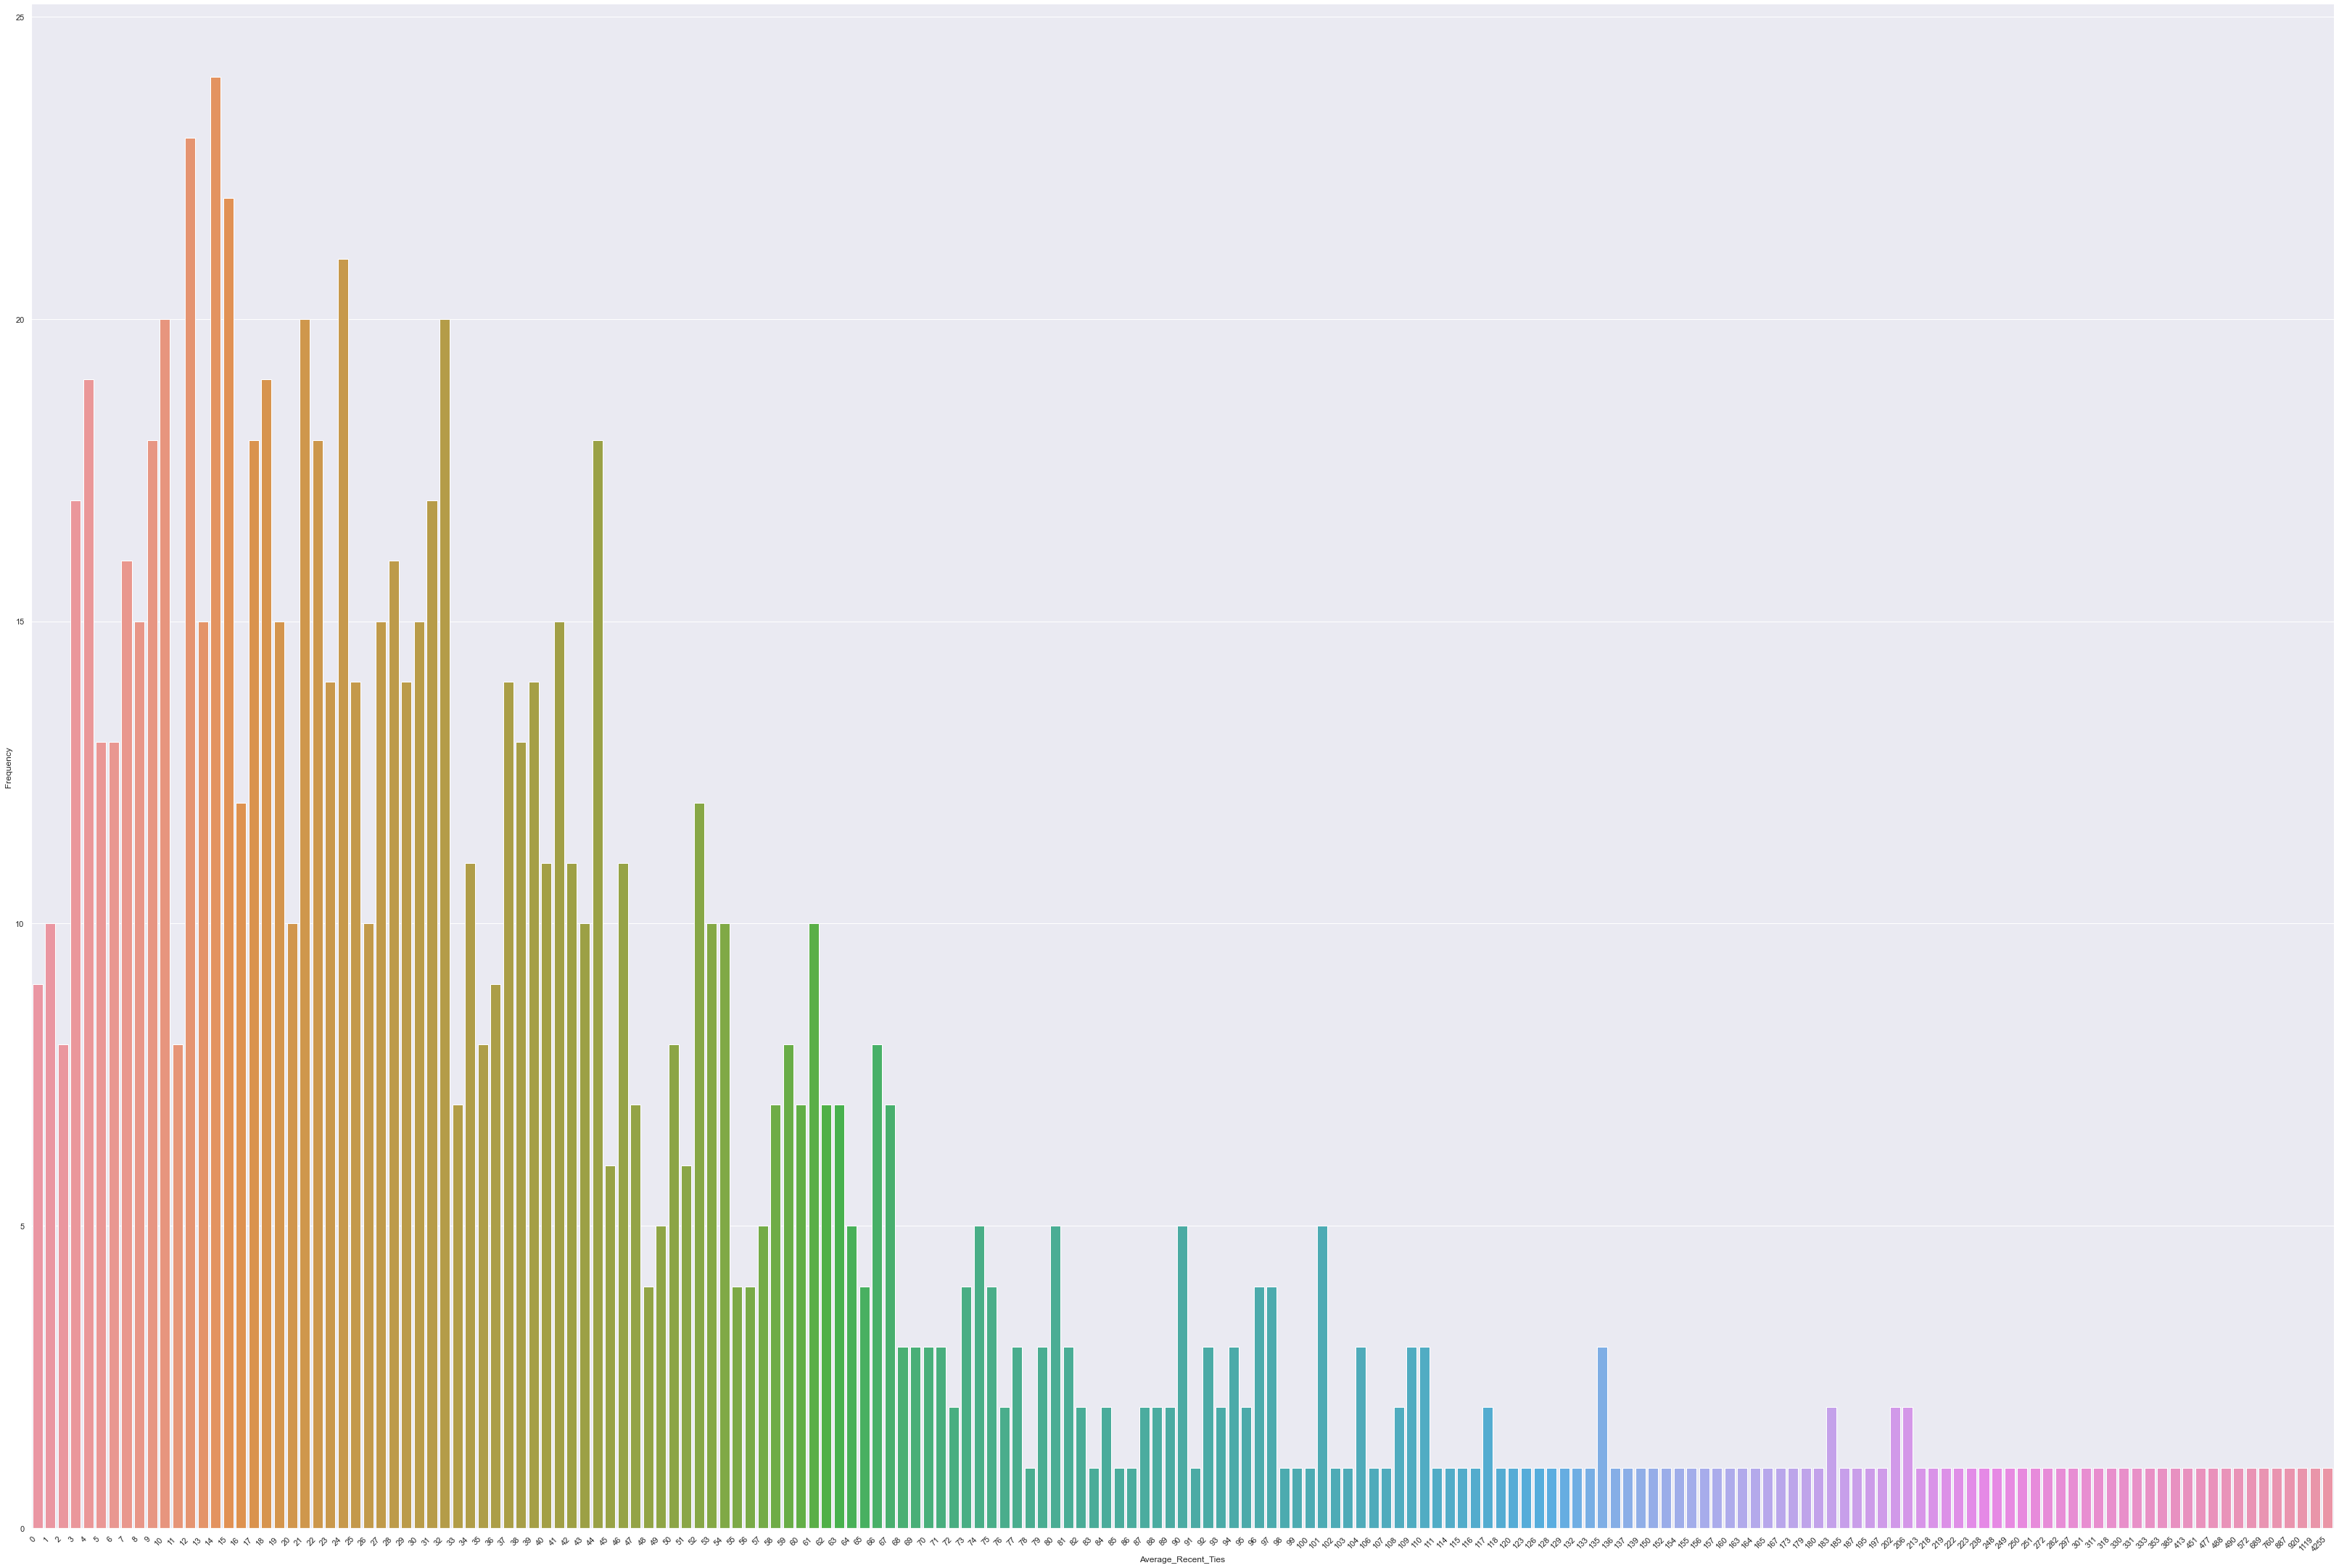

In [3]:
g = sns.catplot(x="Average_Recent_Ties", y="Frequency",data=recent_freq_percDF, kind="bar", height=30, aspect=30/20)
g = g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha="right")

#### Logarithmic Scale

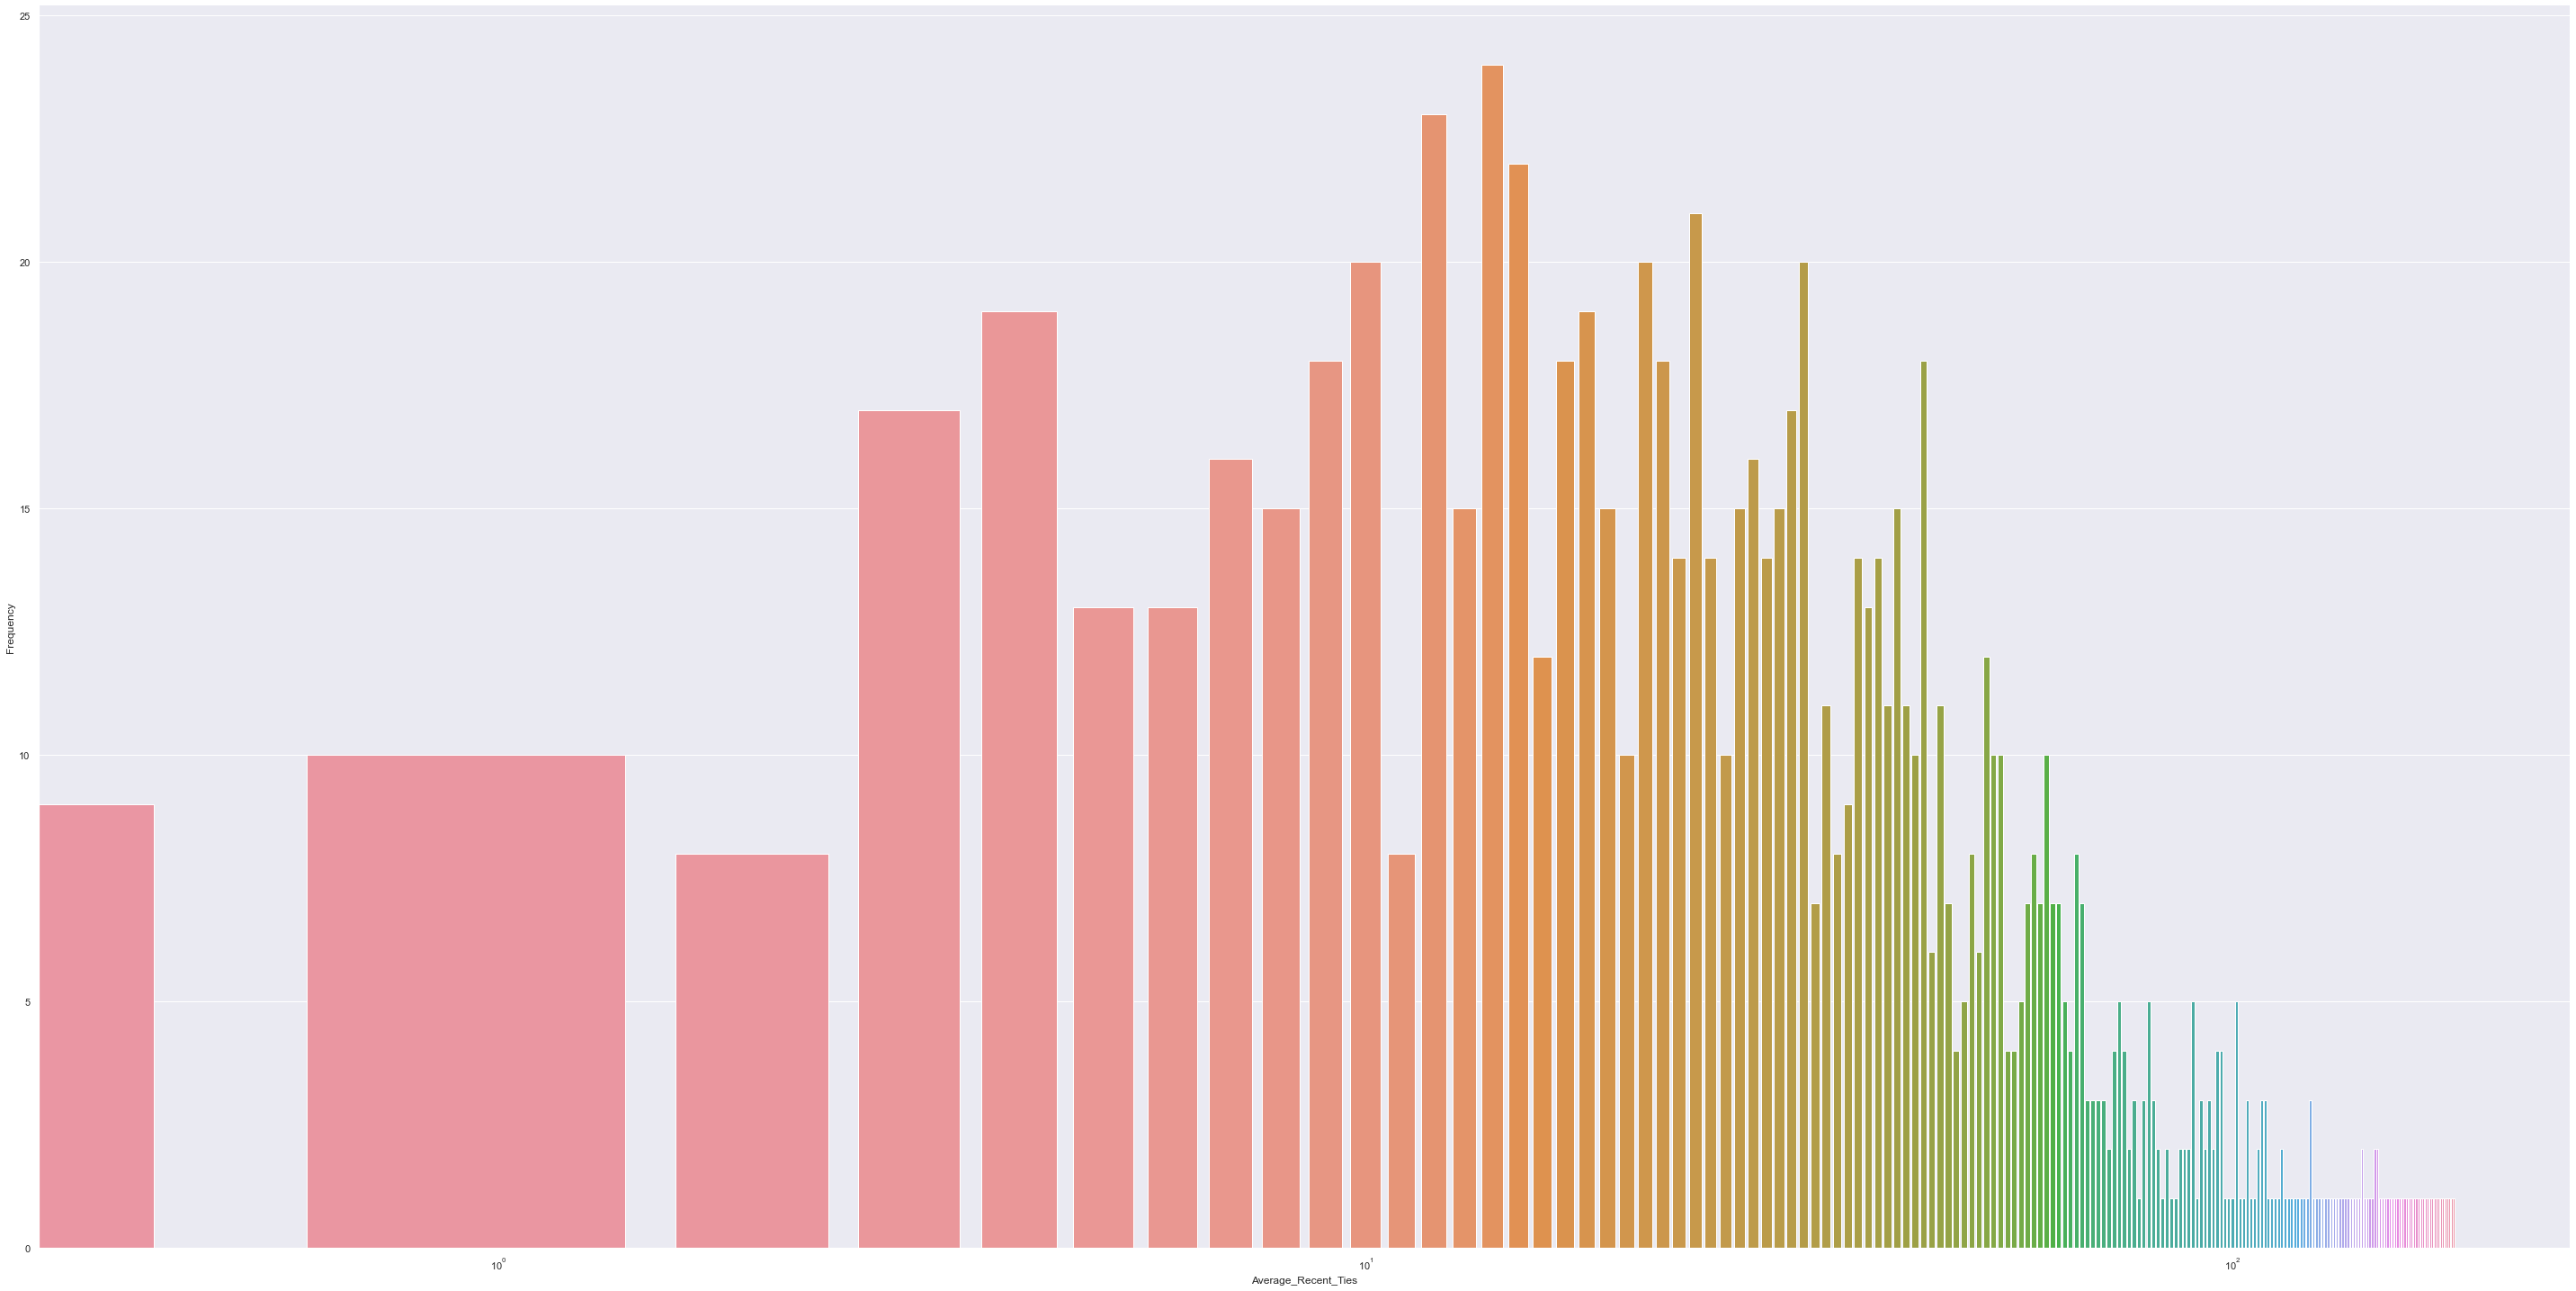

In [4]:
g = sns.catplot(x="Average_Recent_Ties", y="Frequency",data=recent_freq_percDF, kind="bar", height=20, aspect=40/20)
g = g.set(xscale='log')

### Proportion of recent relationships for categories of age

In [5]:
df_recent = all_recent_alters_csv_to_df('../sample_data_recent_alter_csv/csv/*.csv')
df_socio_cat = age_gender_profession_csv_to_df('../sample_data_egos_age/egos-age-gender-profession.csv')
df_merged = merged_df(df_recent,df_socio_cat)
df_mean_age_binned = mean_age_df_binned(df_merged)
df_mean_age = mean_age_df(df_merged)

#### Age Plot

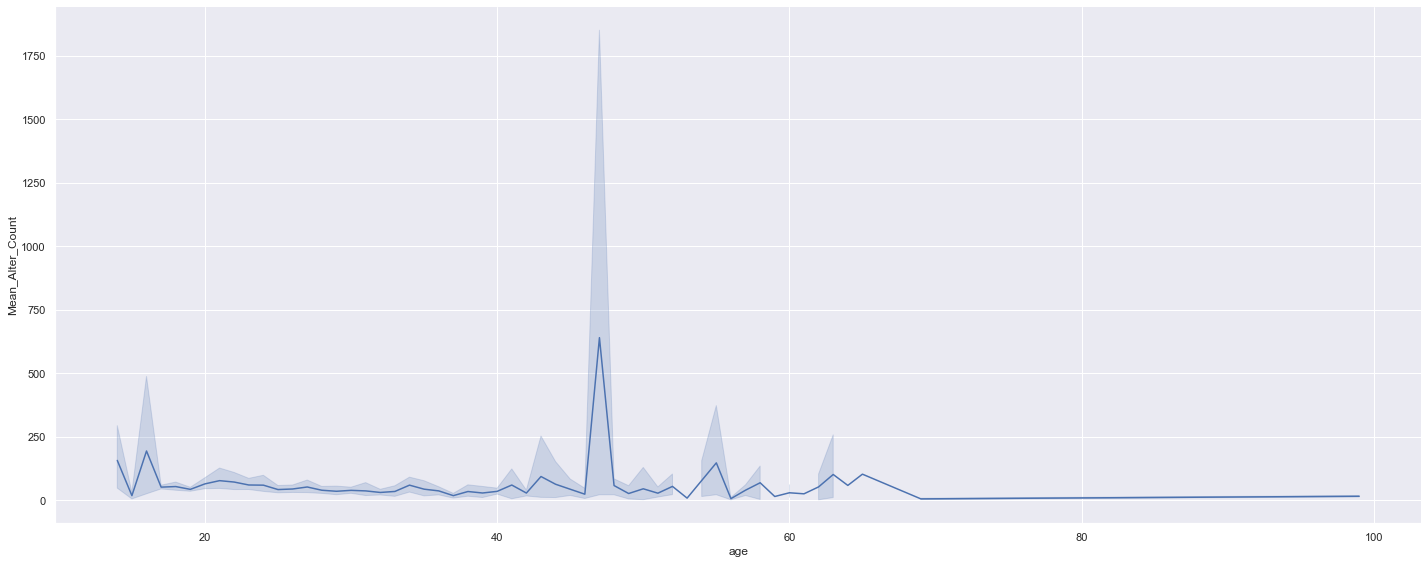

In [15]:
g = sns.relplot(x='age',y='Mean_Alter_Count',data=df_mean_age,kind='line',height=8,aspect=20/8)

#### Binned Age Plot

In [7]:
df_mean_age_binned.style.hide_index()

age_range,Mean_Alter_Count,egos,age_range_str
"(0, 18]",75.361901,49,"(0, 18]"
"(18, 30]",56.334754,454,"(18, 30]"
"(30, 59]",63.896013,233,"(30, 59]"
"(59, 75]",57.474917,14,"(59, 75]"
"(75, 100]",16.283273,2,"(75, 100]"


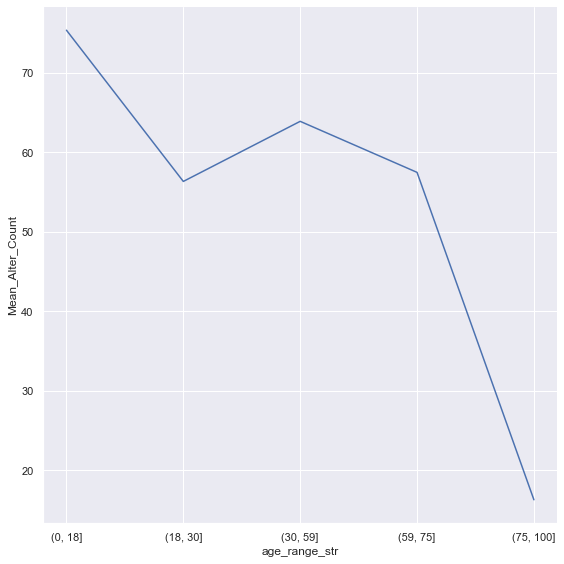

In [8]:
g = sns.relplot(x='age_range_str',y='Mean_Alter_Count',data=df_mean_age_binned,kind='line',height=8)

### Proportion of recent relationships per gender 

In [9]:
df_mean_gender = mean_gender_df(df_merged)

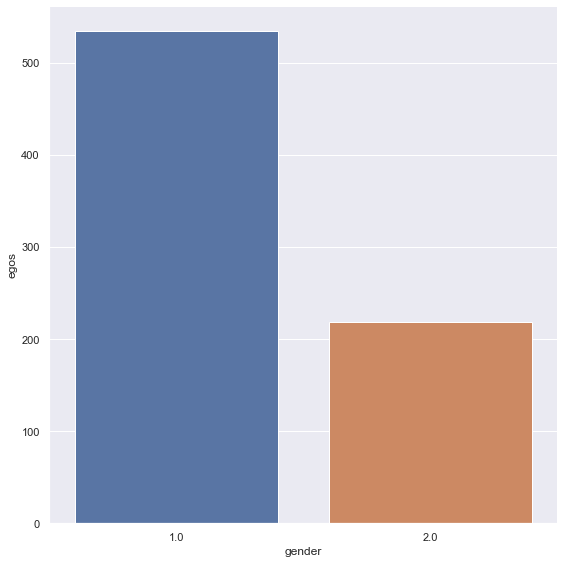

In [10]:
g = sns.catplot(x="gender", y="egos",data=df_mean_gender, kind="bar",height=8)

### Proportion of recent relationships per professions

In [11]:
df_mean_profession = mean_professions(df_merged)

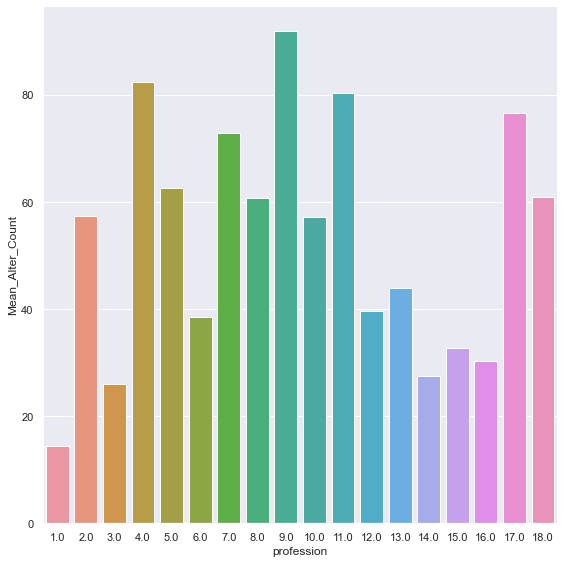

In [12]:
g = sns.catplot(x="profession", y="Mean_Alter_Count",data=df_mean_profession, kind="bar",height=8)

## LOST TIES
## RENEWAL OF LINKS